In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import random

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


The model is
\begin{eqnarray*}
S(t)=S(0) \exp((\mu - \sigma^2/2) t + \sigma W(t)
\end{eqnarray*}
which can be stated in any of the two equivalent forms
\begin{eqnarray*}
S(t+\Delta t)=S(t) \exp((\mu - \sigma^2/2) \Delta t + \sigma (W(t+\Delta) -W(t)) ) = (d)= S(t) \exp((\mu - \sigma^2/2) \Delta t + \sigma (W(\Delta)  ) 
\end{eqnarray*}

The normal random number generator is called as follows:

In [2]:
np.random.normal()

0.7990086041252072

In [7]:
# single realization from GMB at time t

def GBM_St(t,S_0,mu,sigma):
    St=S_0*np.exp((mu-1/2*sigma**2)*t+sigma*np.sqrt(t)*np.random.normal())
    return St

# a sample of multiple realizations from GBM at time t

def GBM_St_sample(t,S_0,mu,sigma,M):
    St_sample=np.zeros(M)   # generate empty array
    for i in range(len(St_sample)):
        St_sample[i]=GBM_St(t,S_0,mu,sigma)
    return St_sample

In [6]:
GBM_St(1,10,0.4,0.3)

13.347963992545003

0.3606477759552253
0.35500000000000004
0.09223408730557696
0.09


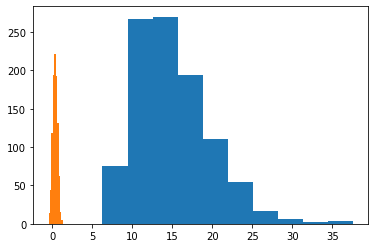

In [14]:
t=1
S_0=10
mu=0.4
sigma=0.3
M=1000
St_sample=GBM_St_sample(t,S_0,mu,sigma,M)
plt.hist(St_sample)
plt.hist(np.log(St_sample/S_0))
print(np.log(St_sample/S_0).mean())
print(mu-1/2*sigma**2)
print(np.log(St_sample/S_0).var())
print(sigma**2)

GBM paths

In [37]:
def GBM_path(T,S_0,N_discr,mu,sigma):
    dt=T/N_discr
    alpha=mu-1/2*sigma**2
    path=np.zeros(N_discr)
    time=np.zeros(N_discr)
    time[0]=0
    path[0]=S_0
    for i in range(len(time)-1):
        time[i+1]=time[i]+dt
        path[i+1]=path[i]*1.1   #*np.exp(alpha*dt+sigma*np.sqrt(dt)*np.random.normal())
    return times, path
    

In [39]:
time=np.zeros(10)
path=np.zeros(10)
print(len(time))
dt=0.1
N=10
time[0]=0
path[0]=1
for i in range(len(time)-1):
    time[i+1]=time[i]+dt
    path[i+1]=path[i]*np.exp(np.random.normal())
print(time)
print(path)

10
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[ 1.          0.77133336  1.02168017  0.61959859  0.72753419  0.29120896
  0.42192552  2.18438394  5.28935641 17.77898445]


ValueError: x and y must have same first dimension, but have shapes (98,) and (10,)

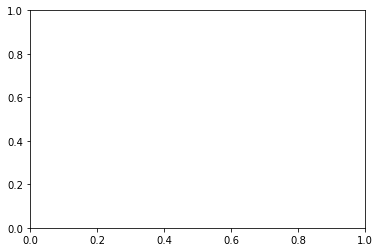

In [38]:
T=1
S_0=10
mu=0.4
sigma=0.3
N_discr=10
times, path=GBM_path(T,S_0,N_discr,mu,sigma)
plt.plot(times, path)

In [3]:
N=1000
sample=np.zeros(N)
for i in range(N):      # i=0,1, ... , N-1
    sample[i]=random.rand()
    
#sample

plt.hist(sample)


(array([ 99., 118., 117.,  96., 110., 104.,  89.,  85.,  93.,  89.]),
 array([2.80496272e-04, 9.99882759e-02, 1.99696056e-01, 2.99403835e-01,
        3.99111615e-01, 4.98819395e-01, 5.98527174e-01, 6.98234954e-01,
        7.97942734e-01, 8.97650513e-01, 9.97358293e-01]),
 <BarContainer object of 10 artists>)

In [4]:
sample.mean()

0.4756830005118094

In [5]:
sample.var()

0.08128123495404761

In [9]:
1/12

0.08333333333333333

In [6]:
def my_mean(x):
    n=len(x)   # sample size
    test=0
    for i in range(n):
        test=test+x[i]
    mean_=test/n
    return mean_


def my_variance(x):
    n=len(x)
    mean_est=my_mean(x)
    test=0
    for i in range(n):
        test=test+(x[i]-mean_est)**2
    var_est=test/n
    return var_est

In [7]:
mean_est=my_mean(sample)
print(mean_est)
var_est=my_variance(sample)
print(var_est)

0.4756830005118093
0.08128123495404749


In [8]:
# the next function generates samples frm the bernoulli distribution

def binomial_rv(u,d,p):   # bernoulli_rv
    x = random.rand()
    if x<p:
        z=u
    else:
        z=d
    return z

In [9]:
u=1.05
d=0.95
p=0.5
binomial_rv(u,d,p)

1.05

(array([672.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 328.]),
 array([0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05]),
 <BarContainer object of 10 artists>)

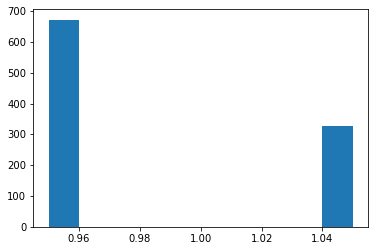

In [10]:
u=1.05
d=0.95
p=0.3

N=1000

h=np.zeros((N))   # initiate a  vector of zeros
for i in range(N):
    h[i]=binomial_rv(u,d,p)
    

plt.hist(h)                       # histogram of returns


In [11]:
h.mean()

0.9828

In [12]:
h.var()

0.0022041600000000045

In [13]:
my_mean(h)

0.9828000000000056

In [14]:
my_variance(h)

0.0022041600000000036

In [15]:
# generate single path from binomial model

def binomial_model_path(S_0,u,d,p,T):
    S=np.zeros((T))
    S[0]=S_0
    for i in range(1,T):   # i=1, 2, ..., T-1
        S[i]=S[i-1]*binomial_rv(u,d,p)
    return S    

1.01


Text(0.5, 0, 'n')

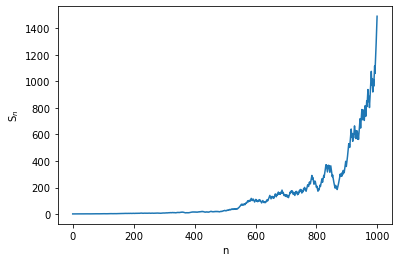

In [16]:
T=1000
u=1.05
d=0.95
p=0.6
alpha=p*u+(1-p)*d
print(alpha)
S_0=1.
S_path=binomial_model_path(S_0,u,d,p,T)

plt.plot(S_path)
plt.ylabel('S$_{n}$')
plt.xlabel('n')


In [17]:
# generate multiple paths from the binomial model

def binomial_model_paths(S_0,u,d,p,T,M):
    S_mult=np.zeros((M,T))   # M rows and T columns
    for i in range(M):       # fill array row by row
        S_mult[i,:]=binomial_model_path(S_0,u,d,p,T)   # set i-th line 
    return S_mult

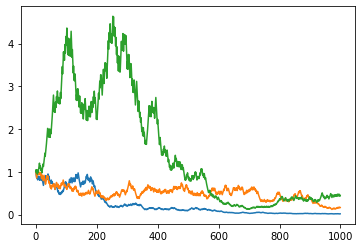

In [18]:
T=1000
u=1.05
d=0.95
p=0.5
S_0=1

M=10
S_paths=binomial_model_paths(S_0,u,d,p,T,M)

plt.plot(S_paths[0,:])   # the first path
plt.plot(S_paths[1,:])  # the second path
plt.plot(S_paths[2,:])  # the third path


In [19]:
T=1000
u=1.05
d=0.95
p=0.5
S_0=1

M=10
S_paths=binomial_model_paths(S_0,u,d,p,T,M)


# if you run each of the above individually you get single graphs
# if you run all 3 as a block you get one plot with all 3 graphs


# or if you want to put all graphs 

for i in range(M):
    plt.plot(S_paths[i,:])   # plot the path i
    plt.xlabel('t')   
    plt.ylabel('S(t)')
    plt.title('Multiple possible paths from a stock price model')

In [20]:
M=1000
S_paths=binomial_model_paths(S_0,u,d,p,T,M)

S_50_sample=S_paths[:,50]   # sample from S(50)
S_100_sample=S_paths[:,100]   # sample from S(100)
S_500_sample=S_paths[:,500]   # sample from S(500)
S_999_sample=S_paths[:,999]   # sample from S(999)


(array([ 57., 166., 333., 213., 129.,  38.,  28.,  31.,   4.,   1.]),
 array([0.31239205, 0.536705  , 0.76101795, 0.9853309 , 1.20964385,
        1.4339568 , 1.65826975, 1.8825827 , 2.10689565, 2.3312086 ,
        2.55552155]),
 <BarContainer object of 10 artists>)

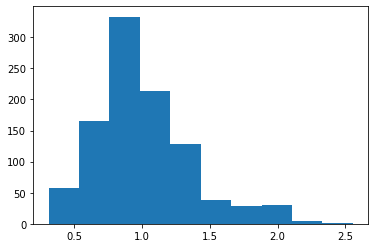

In [21]:
plt.hist(S_50_sample)

(array([173., 375., 227., 131.,  50.,  25.,  10.,   5.,   1.,   3.]),
 array([0.17790744, 0.55605783, 0.93420823, 1.31235862, 1.69050901,
        2.0686594 , 2.44680979, 2.82496018, 3.20311058, 3.58126097,
        3.95941136]),
 <BarContainer object of 10 artists>)

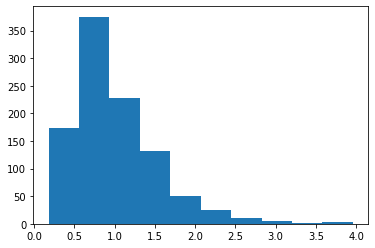

In [22]:
plt.hist(S_100_sample)

(array([951.,  29.,  10.,   5.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([1.35388292e-03, 5.48328943e+00, 1.09652250e+01, 1.64471605e+01,
        2.19290961e+01, 2.74110316e+01, 3.28929672e+01, 3.83749027e+01,
        4.38568383e+01, 4.93387738e+01, 5.48207093e+01]),
 <BarContainer object of 10 artists>)

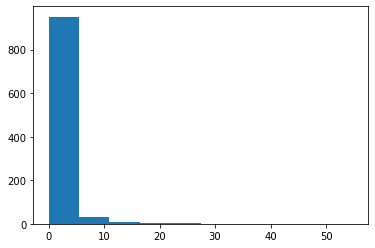

In [40]:
plt.hist(S_999_sample)

(array([  5.,  18.,  52., 146., 275., 242., 161.,  70.,  25.,   6.]),
 array([-6.60477858, -5.54389392, -4.48300926, -3.42212459, -2.36123993,
        -1.30035527, -0.23947061,  0.82141405,  1.88229871,  2.94318337,
         4.00406803]),
 <BarContainer object of 10 artists>)

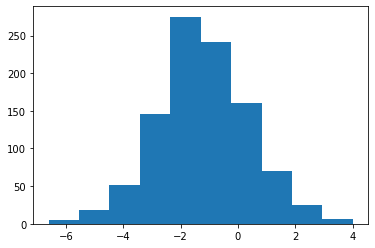

In [42]:
plt.hist(np.log(S_999_sample))

(array([ 16.,  55., 118., 203., 256., 197., 110.,  29.,  14.,   2.]),
 array([-5.50386053, -4.54305933, -3.58225813, -2.62145693, -1.66065572,
        -0.69985452,  0.26094668,  1.22174788,  2.18254908,  3.14335029,
         4.10415149]),
 <BarContainer object of 10 artists>)

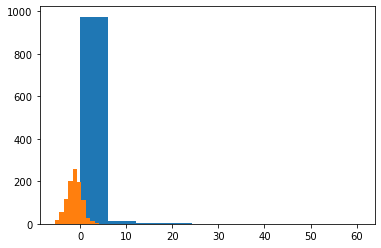

In [19]:
M=1000
S_paths=binomial_model_paths(S_0,u,d,p,T,M)


plt.hist(S_paths[:,999])  # histogram of a sample of observ. for  S(100)

plt.hist(np.log(S_paths[:,999]))  # histogram of a sample of observ. for ln S(100)
                                  # close to normal


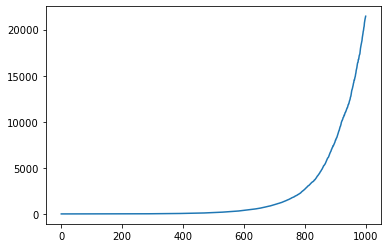

In [23]:
T=1000
u=1.05
d=0.95
p=0.6

M=1000
S_paths=binomial_model_paths(S_0,u,d,p,T,M)  # S_paths is an array each row is a path each column is a
                                             # sample of S(n) for different n
    
n_rows,m_columns=S_paths.shape

n_list=[]
mean_list=[]
for j in range(m_columns):
    n_list.append(j)            # this will contain the time instants
    sample=S_paths[:,j]    # call the j column which is a sample for S(j)
    mean_est=my_mean(sample)
    mean_list.append(mean_est)
    
time_index=np.array(n_list)
mean_value=np.array(mean_list)

plt.plot(time_index,mean_value)

In [45]:
n

1000

In [46]:
m

1000